In [1]:
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from gensim import corpora, models
import gensim
import nltk
import pandas as pd
import re
import random
import matplotlib.pyplot as plt
import pyLDAvis.gensim as gensimvis
import pyLDAvis
%matplotlib inline

# Load Data

In [20]:
articles = pd.read_csv('./Data/New_Full-Economic-News-DFE-839861.csv')

In [21]:
articles.text.head()

0    NEW YORK -- Yields on most certificates of dep...
1    The Wall Street Journal Online</br></br>The Mo...
2    WASHINGTON -- In an effort to achieve banking ...
3    The statistics on the enormous costs of employ...
4    NEW YORK -- Indecision marked the dollar's ton...
Name: text, dtype: object

In [22]:
#Text cleaning to remove numbers and special charaters

def Word_cleaning(entry):
    entry_low_case = entry.lower()
    
    #remove content before the first "--" and "</br></br>"
    for i in range(35):
        if ((entry_low_case[i:i+2] == '--') or (entry_low_case[i:i+10] == '</br></br>')):
            entry_low_case = entry_low_case[i:]
    
    #keep only words
    Only_words = re.sub('[^a-z]+', ' ', entry_low_case).strip()
    #words = Only_words.split()
    
    return(Only_words)

In [23]:
articles["Text_Clean"] = articles["text"].apply(lambda item: Word_cleaning(str(item)))

In [24]:
articles["Text_Clean"] 

0       yields on most certificates of deposit offered...
1       br br the morning brief a look at the day s bi...
2       in an effort to achieve banking reform senate ...
3       the statistics on the enormous costs of employ...
4       indecision marked the dollar s tone as traders...
5       stocks declined as investors weighed slower th...
6       royal bank of canada and bank of montreal post...
7       many people think that the monster of health c...
8       sequenom inc a genomics based biotechnology co...
9       the u s dollar declined against most major for...
10      br br a late pop by general motors kept the do...
11      mci worldcom inc fueled by growth in internet ...
12      br br the dreaded d word is back in circulatio...
13      commercial and industrial loan volume in the u...
14      a week before an international economic summit...
15      according to kevin a hassett and aparna mathur...
16      the long black braid the blinding white cotton...
17      the do

In [25]:
Clean_Text = articles["Text_Clean"].tolist()

In [54]:
# Lemmatization 
from nltk.corpus import wordnet
lemmatizer = WordNetLemmatizer()
Text_lemmatized = [[lemmatizer.lemmatize(word, wordnet.NOUN) for word in document.split()] for document in Clean_Text]

In [55]:
Text_lemmatized

[['yield',
  'on',
  'most',
  'certificate',
  'of',
  'deposit',
  'offered',
  'by',
  'major',
  'bank',
  'dropped',
  'more',
  'than',
  'a',
  'tenth',
  'of',
  'a',
  'percentage',
  'point',
  'in',
  'the',
  'latest',
  'week',
  'reflecting',
  'the',
  'overall',
  'decline',
  'in',
  'short',
  'term',
  'interest',
  'rate',
  'br',
  'br',
  'on',
  'small',
  'denomination',
  'or',
  'consumer',
  'cd',
  'sold',
  'directly',
  'by',
  'bank',
  'the',
  'average',
  'yield',
  'on',
  'six',
  'month',
  'deposit',
  'fell',
  'to',
  'from',
  'in',
  'the',
  'week',
  'ended',
  'yesterday',
  'according',
  'to',
  'an',
  'bank',
  'survey',
  'by',
  'banxquote',
  'money',
  'market',
  'a',
  'wilmington',
  'del',
  'information',
  'service',
  'br',
  'br',
  'on',
  'three',
  'month',
  'consumer',
  'deposit',
  'the',
  'average',
  'yield',
  'sank',
  'to',
  'from',
  'the',
  'week',
  'before',
  'according',
  'to',
  'banxquote',
  'two',
  

In [57]:
#Remove stop words and words with length less than 2
stopwords = nltk.corpus.stopwords.words('english')
len_filter = 2
Final_Text = [[word for word in document if (word not in stopwords) and (len(word)>len_filter)] for document in Text_lemmatized]

In [58]:
Final_Text

[['yield',
  'certificate',
  'deposit',
  'offered',
  'major',
  'bank',
  'dropped',
  'tenth',
  'percentage',
  'point',
  'latest',
  'week',
  'reflecting',
  'overall',
  'decline',
  'short',
  'term',
  'interest',
  'rate',
  'small',
  'denomination',
  'consumer',
  'sold',
  'directly',
  'bank',
  'average',
  'yield',
  'six',
  'month',
  'deposit',
  'fell',
  'week',
  'ended',
  'yesterday',
  'according',
  'bank',
  'survey',
  'banxquote',
  'money',
  'market',
  'wilmington',
  'del',
  'information',
  'service',
  'three',
  'month',
  'consumer',
  'deposit',
  'average',
  'yield',
  'sank',
  'week',
  'according',
  'banxquote',
  'two',
  'bank',
  'banxquote',
  'survey',
  'citibank',
  'new',
  'york',
  'corestates',
  'pennsylvania',
  'paying',
  'threemonth',
  'small',
  'denomination',
  'decline',
  'somewhat',
  'smaller',
  'five',
  'year',
  'consumer',
  'eased',
  'banxquote',
  'said',
  'yield',
  'three',
  'month',
  'six',
  'month',

In [59]:
dictionary = corpora.Dictionary(Final_Text)

In [60]:
dictionary.filter_extremes(no_below=5, no_above=0.5)
dictionary.compactify()

In [61]:
corpus = [dictionary.doc2bow(doc) for doc in Final_Text]

In [62]:
print(corpus[0])

[(0, 4), (1, 1), (2, 3), (3, 1), (4, 1), (5, 4), (6, 1), (7, 1), (8, 2), (9, 2), (10, 1), (11, 4), (12, 1), (13, 1), (14, 2), (15, 1), (16, 1), (17, 1), (18, 1), (19, 2), (20, 2), (21, 3), (22, 2), (23, 1), (24, 2), (25, 2), (26, 4), (27, 1), (28, 1), (29, 1), (30, 2), (31, 2), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 2), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1)]


In [63]:
corpora.MmCorpus.serialize('Economic_news.mm', corpus)

In [64]:
dictionary.save('Economic_news.dict')

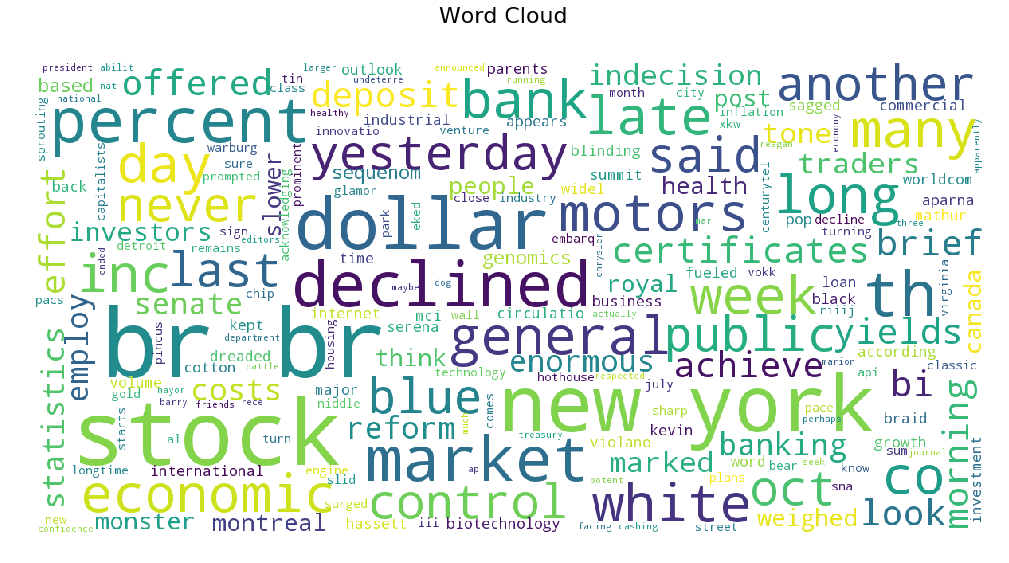

In [51]:
# Word cloud
from wordcloud import WordCloud
def plot_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='White',  
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=10 
    ).generate(str(data))
    
    fig = plt.figure(1, figsize=(14, 14))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=22)
        fig.tight_layout()
        fig.subplots_adjust(top=1.35)

    plt.imshow(wordcloud)
    plt.show()
    
plot_wordcloud(articles["Text_Clean"], 'Word Cloud')

# Fit the LDA Model

In [22]:
lda = models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=30, passes=20)

In [29]:
#Show log_perplexity

lda.log_perplexity(corpus)

-7.8097142323359838

In [23]:
print(lda.print_topics(num_topics=3, num_words=3))

[(9, '0.227*"per" + 0.163*"cent" + 0.032*"carter"'), (1, '0.086*"mexico" + 0.030*"mexican" + 0.030*"communist"'), (0, '0.053*"war" + 0.020*"iraq" + 0.017*"military"')]


In [24]:
lda.save('Economic_news.model')

# Visualization

In [26]:
vis_data = gensimvis.prepare(lda, corpus, dictionary)
pyLDAvis.display(vis_data)

/Applications/anaconda/lib/python3.6/site-packages/pyLDAvis/_prepare.py:387: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  topic_term_dists = topic_term_dists.ix[topic_order]


# Load Saved Dictionary and Corpus

In [2]:
dictionary = corpora.dictionary.Dictionary.load('Economic_news.dict')
corpus = corpora.MmCorpus('Economic_news.mm')

In [3]:
print(dictionary)

Dictionary(10558 unique tokens: ['yield', 'certificate', 'deposit', 'offered', 'major']...)


In [4]:
print(corpus[0])

[(0, 4.0), (1, 1.0), (2, 3.0), (3, 1.0), (4, 1.0), (5, 4.0), (6, 1.0), (7, 1.0), (8, 2.0), (9, 2.0), (10, 1.0), (11, 4.0), (12, 1.0), (13, 1.0), (14, 2.0), (15, 1.0), (16, 1.0), (17, 1.0), (18, 1.0), (19, 2.0), (20, 2.0), (21, 3.0), (22, 2.0), (23, 1.0), (24, 2.0), (25, 2.0), (26, 4.0), (27, 1.0), (28, 1.0), (29, 1.0), (30, 2.0), (31, 2.0), (32, 1.0), (33, 1.0), (34, 1.0), (35, 1.0), (36, 1.0), (37, 1.0), (38, 2.0), (39, 1.0), (40, 1.0), (41, 1.0), (42, 1.0), (43, 1.0), (44, 1.0), (45, 1.0), (46, 1.0), (47, 1.0), (48, 1.0), (49, 1.0), (50, 1.0), (51, 1.0), (52, 1.0), (53, 1.0), (54, 1.0), (55, 1.0), (56, 1.0), (57, 1.0), (58, 1.0)]


In [5]:
len(corpus)

8000

# Tune LDA Hyperparameters

In [8]:
# Candidates
ParameterLlist = {'iter': [100, 300, 500], 'topic_nums': range(1, 30, 1)}

In [9]:
ParameterLlist['topic_nums']

range(1, 30)

# Topic Coherence
## Umass 
Umass is based on document cooccurrence counts, a one-preceding segmentation and a logarithmic conditional probability as confirmation measure.

The main idea of this coherence is that the occurrence of every top word should be supported by every top preceding top word. Thus, the probability of a top word to occur should be higher if a document already contains a higher order top word of the same topic. Therefore, for every word the logarithm of its conditional probability is calculated using every other top word that has a higher order in the ranking of top words as condition. The probabilities are derived using document cooccurrence counts. The single conditional probabilities are summarized using the arithmetic mean.

In [6]:
#Initialize
Umass_100 = []
Umass_300 = []
Umass_500 = []
#epsilon = 0.001

In [13]:
#for i in ParameterLlist['iter']:
i=500    
    
for j in ParameterLlist['topic_nums']:
    lda = models.LdaMulticore(corpus=corpus, id2word=dictionary, iterations=i, num_topics=j)   
    cm = models.CoherenceModel(model=lda, corpus=corpus, coherence='u_mass')
    
    '''
    try: 
        #print(cm.get_coherence())
        score = cm.get_coherence()
    except ZeroDivisionError:
        score = score - epsilon
    '''
        
    print("Num of Topics:", j, ",", cm.get_coherence())
    Umass_500.append(cm.get_coherence())
    #Umass_500.append(score)

Num of Topics: 1 , -1.28063483552
Num of Topics: 2 , -1.28167549904
Num of Topics: 3 , -1.32050353804
Num of Topics: 4 , -1.32606554721
Num of Topics: 5 , -1.3012342378
Num of Topics: 6 , -1.2855566776
Num of Topics: 7 , -1.31520891102
Num of Topics: 8 , -1.31316812427
Num of Topics: 9 , -1.34140131749
Num of Topics: 10 , -1.34341492822
Num of Topics: 11 , -1.34951559429
Num of Topics: 12 , -1.35637546705
Num of Topics: 13 , -1.37507201713
Num of Topics: 14 , -1.38703717665
Num of Topics: 15 , -1.40214533854
Num of Topics: 16 , -1.36480479755
Num of Topics: 17 , -1.38464868653
Num of Topics: 18 , -1.39712770532
Num of Topics: 19 , -1.37148421927
Num of Topics: 20 , -1.36828164608
Num of Topics: 21 , -1.38654220933
Num of Topics: 22 , -1.43630027521
Num of Topics: 23 , -1.40398031583
Num of Topics: 24 , -1.38145822743
Num of Topics: 25 , -1.37310174755
Num of Topics: 26 , -1.39593255129
Num of Topics: 27 , -1.42255772409
Num of Topics: 28 , -1.40723337164
Num of Topics: 29 , -1.39655616

In [11]:
Umass_100

[-1.2806348355232924,
 -1.3508177299905237,
 -1.2815256160843005,
 -1.3306684087428666,
 -1.3095907454905729,
 -1.3583741253822919,
 -1.3398636923826195,
 -1.333908778817809,
 -1.40061911685912,
 -1.375926042666002,
 -1.3484943401618983,
 -1.3511010102244796,
 -1.3692980176829148,
 -1.361317561202245,
 -1.3209935578559791,
 -1.3774178777399571,
 -1.3739046313499632,
 -1.3909686709560658,
 -1.3816762237672371,
 -1.384138950557473,
 -1.3871781138524781,
 -1.3848922393518608,
 -1.3811870866826224,
 -1.3788692811915828,
 -1.3939797082347973,
 -1.416253782874952,
 -1.3702905938146428,
 -1.3931472731208852,
 -1.4081669773702825]

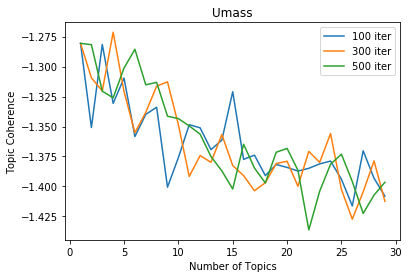

In [14]:
x = ParameterLlist['topic_nums']
plt.plot(x, Umass_100)
plt.plot(x, Umass_300)
plt.plot(x, Umass_500)
plt.xlabel("Number of Topics")
plt.ylabel("Topic Coherence")
plt.legend(['100 iter','300 iter', '500 iter'], loc='upper right')
plt.title('Umass')
plt.show()

## Visualize (iterations=300 and num_topics=4)

In [67]:
lda = models.LdaMulticore(corpus=corpus, id2word=dictionary, iterations=300, num_topics=4)

In [68]:
vis_data = gensimvis.prepare(lda, corpus, dictionary)
pyLDAvis.display(vis_data)

## C_v
C_v is based on a sliding window, a one-set segmentation of the top words and an indirect confirmation measure that uses normalized pointwise mutual information (NPMI) and the cosinus similarity.

This coherence measure retrieves cooccurrence counts for the given words using a sliding window and the window size 110. The counts are used to calculated the NPMI of every top word to every other top word, thus, resulting in a set of vectors—one for every top word. The one-set segmentation of the top words leads to the calculation of the similarity between every top word vector and the sum of all top word vectors. 

In [38]:
c_v_100 = []
c_v_300 = []
c_v_500 = []

In [36]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [43]:
#for i in ParameterLlist['iter']:
i=500   

for j in ParameterLlist['topic_nums']:
    #lda = models.LdaModel(corpus=corpus, id2word=dictionary, iterations=i, num_topics=j)   
    
    lda = models.LdaMulticore(corpus=corpus, id2word=dictionary, iterations=i, num_topics=j) 
    
    cm = models.CoherenceModel(model=lda, texts=Final_Text, dictionary=dictionary, coherence='c_v')  #need to use "texts" here
    print("Num of Topics:", j, ",", cm.get_coherence())
    c_v_500.append(cm.get_coherence())

Num of Topics: 1 , 0.336174775962
Num of Topics: 2 , 0.355609422175
Num of Topics: 3 , 0.37846207474
Num of Topics: 4 , 0.333569842962
Num of Topics: 5 , 0.351758361779
Num of Topics: 6 , 0.355114384876
Num of Topics: 7 , 0.338695221687
Num of Topics: 8 , 0.332470183605
Num of Topics: 9 , 0.334125662536
Num of Topics: 10 , 0.345711657358
Num of Topics: 11 , 0.359661170546
Num of Topics: 12 , 0.3201926376
Num of Topics: 13 , 0.352478756412
Num of Topics: 14 , 0.349529649893
Num of Topics: 15 , 0.358215064846
Num of Topics: 16 , 0.359671970584
Num of Topics: 17 , 0.353179939738
Num of Topics: 18 , 0.357085192328
Num of Topics: 19 , 0.34340009904
Num of Topics: 20 , 0.353892458888
Num of Topics: 21 , 0.361139053752
Num of Topics: 22 , 0.355222976481
Num of Topics: 23 , 0.348087403397
Num of Topics: 24 , 0.357341839676
Num of Topics: 25 , 0.350655375704
Num of Topics: 26 , 0.353705939385
Num of Topics: 27 , 0.361286080799
Num of Topics: 28 , 0.366670906912
Num of Topics: 29 , 0.35850360459

In [44]:
c_v_500

[0.3361747759620432,
 0.35560942217458946,
 0.37846207474043431,
 0.33356984296196723,
 0.35175836177913683,
 0.35511438487592245,
 0.33869522168681743,
 0.33247018360501152,
 0.3341256625359057,
 0.34571165735758752,
 0.35966117054630059,
 0.32019263759983013,
 0.3524787564116118,
 0.34952964989280277,
 0.35821506484587656,
 0.3596719705835747,
 0.35317993973808204,
 0.3570851923284773,
 0.3434000990402738,
 0.35389245888767518,
 0.36113905375157412,
 0.35522297648055212,
 0.348087403396594,
 0.35734183967575417,
 0.35065537570407956,
 0.35370593938502143,
 0.36128608079879043,
 0.36667090691201654,
 0.35850360459158359]

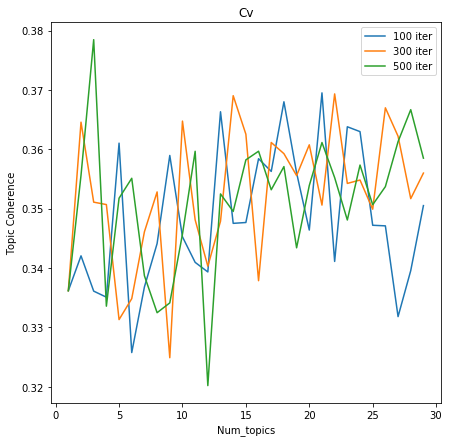

In [47]:
plt.figure(figsize=(7,7))
x = ParameterLlist['topic_nums']
plt.plot(x, c_v_100)
plt.plot(x, c_v_300)
plt.plot(x, c_v_500)
plt.xlabel("Num_topics")
plt.ylabel("Topic Coherence")
plt.legend(['100 iter','300 iter', '500 iter'], loc='upper right')
plt.title('Cv')
plt.show()

## Visualize (iterations=500 and num_topics=3)

In [65]:
lda = models.LdaMulticore(corpus=corpus, id2word=dictionary, iterations=500, num_topics=3)

In [66]:
vis_data = gensimvis.prepare(lda, corpus, dictionary)
pyLDAvis.display(vis_data)